In [4]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

In [51]:
# generate data for Logistic Regression
torch.manual_seed(42)
X1 = torch.randn(1000, 50)
X2 = torch.randn(1000, 50) + 1.5
x_tensor = torch.cat([X1, X2], dim=0)
Y1 = torch.zeros(1000, 1)
Y2 = torch.ones(1000, 1)
y_tensor = torch.cat([Y1, Y2], dim=0)

dataset = CustomDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [1500, 500])

train_loader = DataLoader(dataset=train_dataset, batch_size=20)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

In [52]:
class LogisticModel(torch.nn.Module):
     def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(50, 1)
    
     def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

In [53]:
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    
    return train_step

In [62]:
torch.manual_seed(42)
model = LogisticModel()
lr = 0.01
n_epochs = 1000

loss_fn = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr)

losses = []
val_losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch
        y_batch = y_batch

        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val
            y_val = y_val
            
            model.eval()

            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())

print(model.state_dict())

OrderedDict([('linear.weight', tensor([[0.1929, 0.1341, 0.0679, 0.1118, 0.1002, 0.2160, 0.1952, 0.2597, 0.2573,
         0.1536, 0.2066, 0.1197, 0.1539, 0.2244, 0.1700, 0.2608, 0.2380, 0.2477,
         0.3839, 0.3051, 0.1725, 0.2031, 0.2879, 0.1335, 0.2013, 0.0499, 0.1266,
         0.2333, 0.0765, 0.3576, 0.0963, 0.1625, 0.1197, 0.3317, 0.3260, 0.1793,
         0.1601, 0.2664, 0.3118, 0.1512, 0.3460, 0.1684, 0.1299, 0.2122, 0.2690,
         0.2009, 0.2012, 0.1640, 0.1850, 0.1038]])), ('linear.bias', tensor([-6.4156]))])


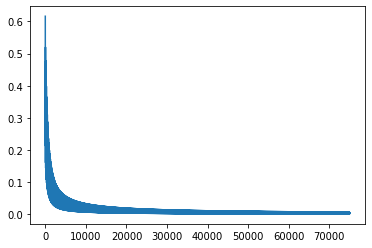

In [63]:
plt.plot(losses)

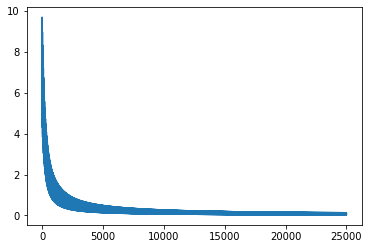

In [64]:
plt.plot(val_losses)